In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
from sklearn.preprocessing import label_binarize
import pickle
from MVDD.MVDD import MVDD
import MVDD.MVDD_Generator as mvGen

%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rc('font', size=12)
warnings.filterwarnings('ignore')

# Hemodynamics

In [2]:
#Load original dataframes
hemoData = pd.read_csv('Data/Preprocessed Data/ESCAPE_Hemo.csv', index_col='ID')
allScores = hemoData['Score']
death = hemoData['ScoreDeath']
rehosp = hemoData['ScoreRehosp']
readm = hemoData['ScoreReadmission']
hemoData

,Age,Gender,Race,EjF,RAP,PAS,PAD,PAMN,PCWP,CO,...,RAT,PPRatio,PAPi,SAPi,CPP,PRAPRat,Score,ScoreDeath,ScoreRehosp,ScoreReadmission
ID,,,,,,,,,,,,,,,,,,,,,
72,88.0,2.0,1.0,25.0,24.0,42.0,24.0,30.0,36.0,2.20,...,0.666667,0.266667,0.750000,0.777778,50.0,1.166667,5,5,5,4
72,88.0,2.0,1.0,25.0,18.0,42.0,24.0,30.0,24.0,3.10,...,0.750000,0.272727,1.000000,1.000000,50.0,1.333333,5,5,5,4
81,69.0,1.0,1.0,20.0,10.0,40.0,20.0,27.0,18.0,4.52,...,0.555556,0.242857,2.000000,0.944444,45.0,1.700000,3,3,3,3
81,69.0,1.0,1.0,20.0,12.0,35.0,15.0,25.0,17.0,4.65,...,0.705882,0.571429,1.666667,2.352941,45.0,3.333333,3,3,3,3
814,58.0,1.0,1.0,NaN,3.0,51.0,19.0,30.0,18.0,4.10,...,0.166667,0.566667,10.666667,1.888889,44.0,11.333333,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98508,57.0,1.0,98.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,37.0,NaN,1,1,1,1
99302,41.0,1.0,2.0,15.0,19.0,87.0,37.0,54.0,44.0,3.90,...,0.431818,0.642857,2.631579,1.227273,13.0,2.842105,4,4,4,5
99302,41.0,1.0,2.0,15.0,11.0,70.0,28.0,44.0,28.0,5.30,...,0.392857,1.088608,3.818182,3.071429,13.0,7.818182,4,4,4,5


In [3]:
# Preprocess and create training and testing sets
hemo = hemoData.drop('Score', axis=1)
hemo = hemo.drop('ScoreDeath', axis=1)
hemo = hemo.drop('ScoreRehosp', axis=1)
hemo = hemo.drop('ScoreReadmission', axis=1)
hemo = hemo.replace(np.inf, 0)
hemo = hemo.fillna(0)

xData = hemo
yData = death
xData.shape, yData.shape

((418, 28), (418,))

## DeLvTx Label


Total edges: 132 Nonterminal Edge 65
Must have more than 20 and less than 39 OR Edges
Best edge set: ['solid', 'solid', 'solid', 'dashed', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'dashed', 'solid', 'dashed', 'dashed', 'solid', 'solid', 'dashed', 'dashed', 'dashed', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'dashed', 'solid', 'solid', 'solid', 'dashed', 'solid', 'solid', 'solid', 'dashed', 'solid', 'solid', 'dashed', 'solid', 'dashed', 'dashed', 'solid', 'dashed', 'solid', 'dashed', 'dashed', 'solid', 'solid', 'dashed', 'dashed', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid']
Accuracy MVDD: [0.76190476 0.94047619 0.66666667 0.80952381 0.94047619]
Averaged acc for all 5 classes: 0.8238095238095239

Total edges: 150 Nonterminal Edge 74
Must have more than 22 and less than 44 OR Edges
Best edge set: ['solid', 'solid', 'solid', 'dashed', 'solid', 'solid', 'solid', 'sol

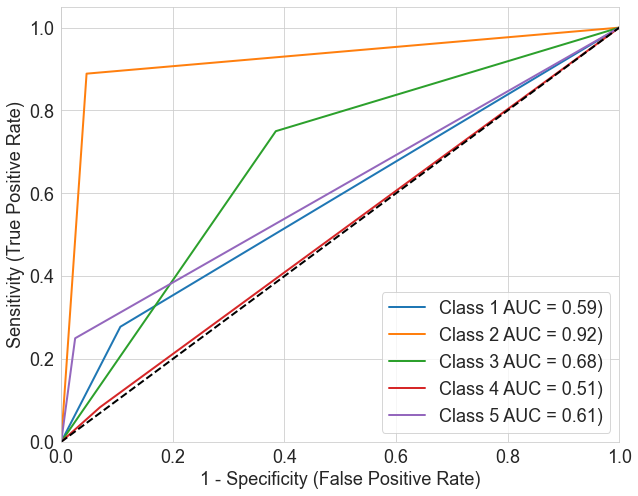

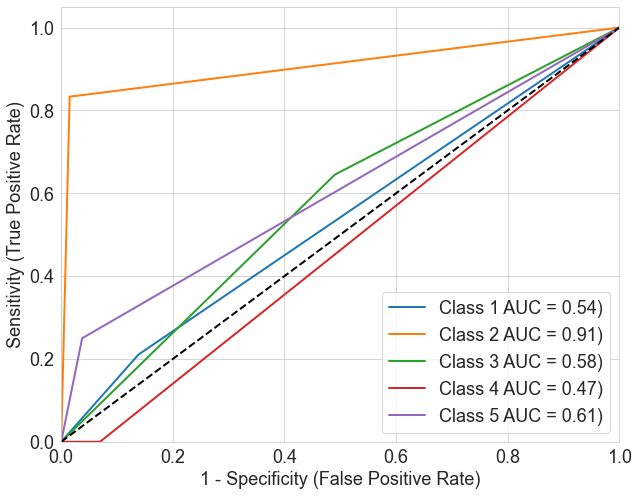

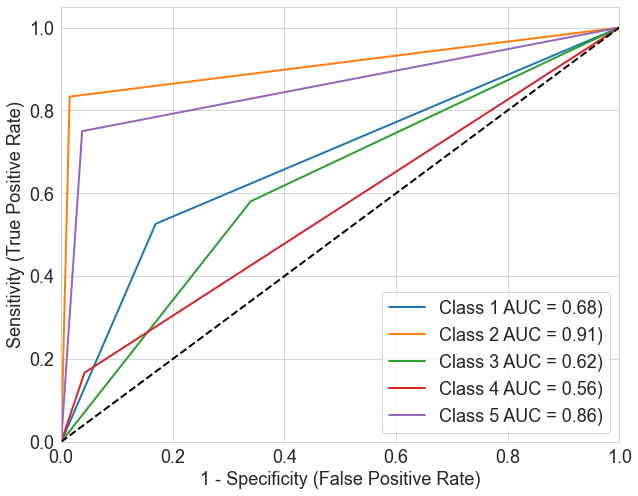

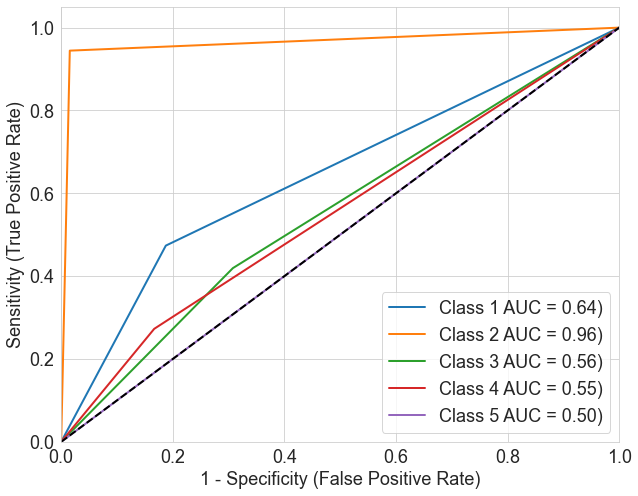

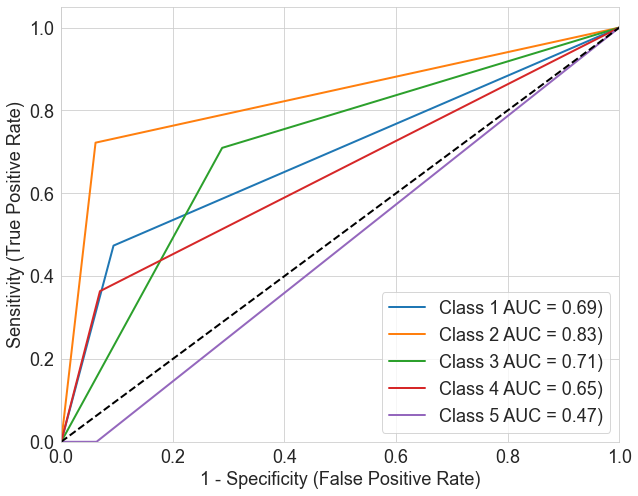

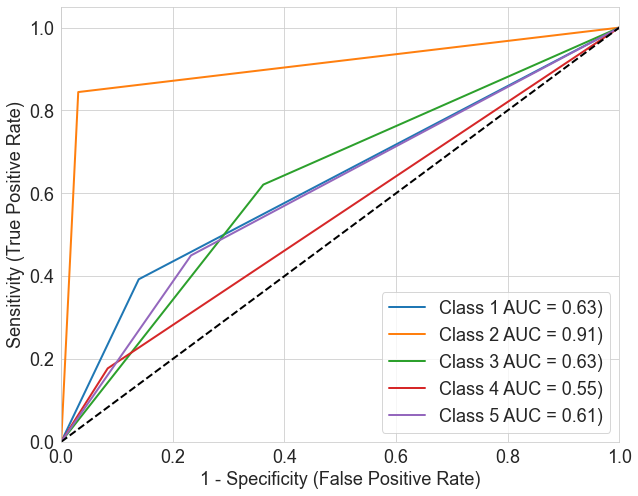

In [4]:
yData = death
mvdd = mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='Hemo_Death', numFolds=5, 
                                        showIndividualROC=True)

In [5]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.to_csv("Graphs/FeatureImportancesHemo_Death.csv")

featureImp.head(10)

,Feature Importance
Gender,0.283548
Age,0.103397
CPP,0.084935
PAMN,0.067870
EjF,0.067053
PPRatio,0.047375
PRAPRat,0.042527
PAPi,0.036213
HRTRT,0.033735
PPP,0.024339


## Rehospitalization


Total edges: 132 Nonterminal Edge 65
Must have more than 20 and less than 39 OR Edges
Best edge set: ['solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'dashed', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'dashed', 'solid', 'dashed', 'dashed', 'solid', 'dashed', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'dashed', 'solid', 'dashed', 'dashed', 'dashed', 'solid', 'dashed', 'solid', 'dashed', 'solid', 'solid', 'solid', 'dashed', 'solid', 'solid', 'dashed', 'solid', 'solid', 'dashed', 'solid', 'solid', 'dashed', 'dashed', 'dashed', 'solid', 'dashed', 'solid', 'solid', 'solid', 'solid', 'dashed', 'solid', 'solid']
Accuracy MVDD: [0.67857143 0.91666667 0.54761905 0.77380952 0.96428571]
Averaged acc for all 5 classes: 0.7761904761904763

Total edges: 150 Nonterminal Edge 74
Must have more than 22 and less than 44 OR Edges
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/josie/PycharmProjects/CARNA/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/6v/0sqpmz912jvb9tnzt29sxghm0000gn/T/ipykernel_39388/1349434603.py", line 2, in <cell line: 2>
    mvdd = mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"],
  File "/Users/josie/PycharmProjects/CARNA/MVDD/MVDD_Generator.py", line 61, in generateTreeCrossValidation
    dt, mvdd = trainCrossValidation(xData, yData, dt, numFolds, classes, learningCriteria, showIndividualROC, modelName)
  File "/Users/josie/PycharmProjects/CARNA/MVDD/MVDD_Generator.py", line 109, in trainCrossValidation
    mvdd = getBestMVDD(dt, X_train, y_train, classes, learningCriteria)
  File "/Users/josie/PycharmProjects/CARNA/MVDD/MVDD_Generator.py", line 318, in getBestMVDD
  File "/Users/josie/PycharmProjects/CARNA/MVDD/MVDD.py", li

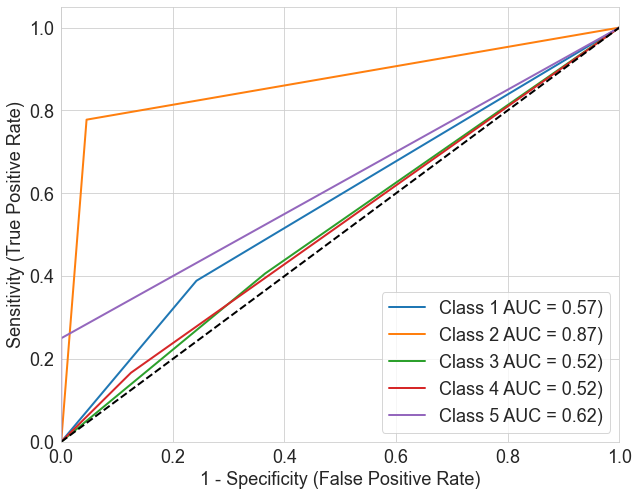

In [6]:
yData = rehosp
mvdd = mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='Hemo_Rehosp', numFolds=5, 
                                        showIndividualROC=True)

In [ ]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.to_csv("Graphs/FeatureImportancesHemo_Rehosp.csv")
featureImp.head(10)

## Readmission

In [ ]:
yData = readm
mvdd = mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='Hemo_Readmission', numFolds=5, 
                                        showIndividualROC=True)

In [ ]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.to_csv("Graphs/FeatureImportancesHemo_Readmission.csv")
featureImp.head(10)

# All Data

In [ ]:
#Load original dataframes
allData = pd.read_csv('Data/Preprocessed Data/ESCAPE_AllData.csv', index_col='ID')
allScores = allData['Score']
death = allData['ScoreDeath']
rehosp = allData['ScoreRehosp']
readm = allData['ScoreReadmission']
allData

In [ ]:
# Preprocess and create training and testing sets
alld = allData.drop('Score', axis=1)
alld = alld.drop('ScoreDeath', axis=1)
alld = alld.drop('ScoreRehosp', axis=1)
alld = alld.drop('ScoreReadmission', axis=1)
alld = alld.replace(np.inf, 0)
alld = alld.fillna(0)

xData = alld
yData = death
xData.shape, yData.shape

## Death Label

In [ ]:
yData = death
mvdd = mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='AllData_Death', numFolds=5, 
                                        showIndividualROC=True)

In [ ]:
# Get Feature importance
featureDict = dict(zip(alld.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.to_csv("Graphs/FeatureImportancesAllData_Death.csv")
featureImp.head(10)

## Rehosp Label

In [ ]:
yData = rehosp
mvdd = mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='AllData_Rehosp', numFolds=5, 
                                        showIndividualROC=True)

In [ ]:
# Get Feature importance
featureDict = dict(zip(alld.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.to_csv("Graphs/FeatureImportancesAllData_Rehosp.csv")
featureImp.head(10)

## Readmission Label

In [ ]:
yData = readm
mvdd = mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='AllData_Readmission', numFolds=5, 
                                        showIndividualROC=True)

In [ ]:
# Get Feature importance
featureDict = dict(zip(alld.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.to_csv("Graphs/FeatureImportancesAllData_Readmission.csv")
featureImp.head(10)